## BASELINE LSTM MODEL

This notebook focuses on building a baseline LSTM model for news text classification, serving as a reference point for further architectural improvements.

<!-- --- -->

In [22]:
import numpy as np
import os 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


import pickle

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
ARTIFACTS_PATH = "../artifacts"

In [ ]:
VOCAB_SIZE = 5000
MAX_LEN = 200
NUM_CLASSES = 5

LOADING THE SEQUENCES

In [ ]:
def load_padded_sequences():
    X_train_pad = np.load(os.path.join(ARTIFACTS_PATH, "X_train_pad.npy"))
    X_test_pad = np.load(os.path.join(ARTIFACTS_PATH, "X_test_pad.npy"))

    return X_train_pad, X_test_pad


def load_labels():
    y_train = np.load(os.path.join(ARTIFACTS_PATH, "y_train.npy"))
    y_test = np.load(os.path.join(ARTIFACTS_PATH, "y_test.npy"))

    return y_train, y_test



X_train_pad , X_test_pad = load_padded_sequences()
y_train, y_test = load_labels()


LOADING LABEL ENCODER

In [16]:
with open("/Users/sarthaksharna/AutoNews/artifacts/label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

<!-- ---- -->

In [ ]:
def create_baseline_model():
    """This function creates the architecture of the baseline model"""
    
    model = Sequential()
    model.add(Input(shape = (MAX_LEN ,)))
    model.add(Embedding(input_dim = VOCAB_SIZE, output_dim = 128))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(NUM_CLASSES, activation = "softmax"))

    model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [7]:
model = create_baseline_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,733 (2.63 MB)

 Trainable params: 689,733 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

<!-- -- -->

EARLY STOPPING

In [ ]:
# Early Stopping to prevent overfitting and stop training when the model stops improving on validation data.

early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

<!-- --- -->

MODEL TRAINING

In [9]:
history = model.fit(
    X_train_pad,
    y_train,
    batch_size = 64,
    epochs = 30,
    validation_split = 0.2,
    callbacks = [early_stop]
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.2529 - loss: 1.5779 - val_accuracy: 0.3196 - val_loss: 1.5482
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.3956 - loss: 1.3979 - val_accuracy: 0.3607 - val_loss: 1.3004
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.4390 - loss: 1.2476 - val_accuracy: 0.3900 - val_loss: 1.3619
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.4676 - loss: 1.2793 - val_accuracy: 0.4106 - val_loss: 1.4059
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.6007 - loss: 1.1019 - val_accuracy: 0.4985 - val_loss: 1.2649
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.6493 - loss: 0.9314 - val_accuracy: 0.4956 - val_loss: 1.1767
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.7397 - loss: 0.7433 - val_accuracy: 0.5777 - val_loss: 0.8883
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7493 - loss: 0.6061 - val_accuracy: 0.

<!-- --- -->

EVALUATING THE MODEL

In [18]:
def evaluate_model_simple(model, X_test, y_test, label_encoder):
    # Keras evaluation
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Predictions
    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_classes))


evaluate_model_simple(model, X_test_pad, y_test, le)



Test Loss: 0.6135
Test Accuracy: 0.8169
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Classification Report:
               precision    recall  f1-score   support

     business       0.89      0.87      0.88       101
entertainment       0.86      0.76      0.81        74
     politics       0.73      0.63      0.68        81
        sport       0.89      0.96      0.92       101
         tech       0.67      0.81      0.74        69

     accuracy                           0.82       426
    macro avg       0.81      0.81      0.80       426
 weighted avg       0.82      0.82      0.82       426


Confusion Matrix:
[[88  1  7  1  4]
 [ 2 56  6  2  8]
 [ 5  2 51  8 15]
 [ 1  2  1 97  0]
 [ 3  4  5  1 56]]


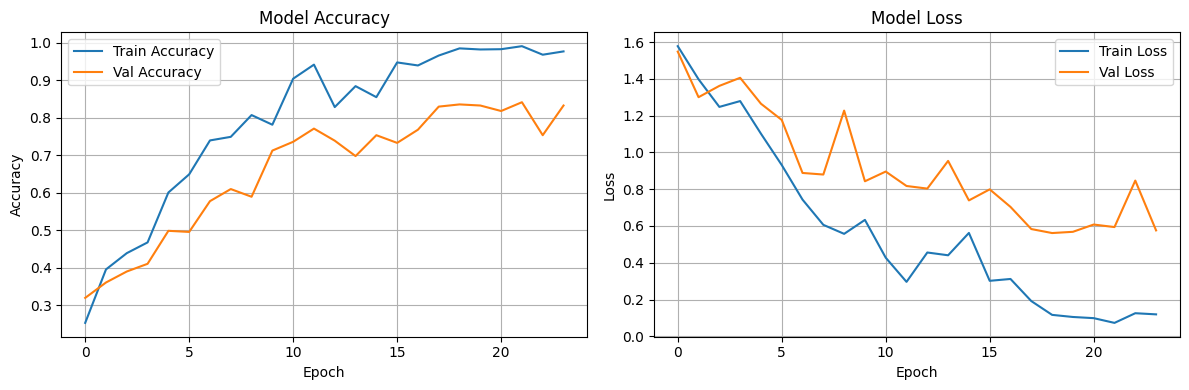

In [21]:
# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<!-- --------- -->

## INFERNECE:

- Model shows signs of overfitting

- Model may be tuned especially by increasing the Dropout